## NLP For East Coast Region News Data using NLTK

In [1]:
import pandas as pd
import nltk                                # Python library for NLP
import matplotlib.pyplot as plt                                        

In [2]:
# Setting options to display all column and row names
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# states in the east coast region
news = pd.read_csv('/Users/meralbalik/Desktop/ChanR/mywork/news.csv')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
news.shape

(9219, 10)

In [6]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9219 entries, 0 to 9218
Data columns (total 10 columns):
author         8590 non-null object
title          9204 non-null object
description    9167 non-null object
url            9219 non-null object
urlToImage     8910 non-null object
publishedAt    9205 non-null object
content        9100 non-null object
source.id      2417 non-null object
source.name    9191 non-null object
county         9191 non-null object
dtypes: object(10)
memory usage: 720.4+ KB


In [7]:
print('There are {} null values in the content column.'.format(news['content'].isnull().sum()))

There are 119 null values in the content column.


In [8]:
# displaying data only with content = NaN 
news[news.content.isnull()].head(3)

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name,county
55,WGME,Police ask for help finding wanted Maine man,ARUNDEL (WGME) &ndash; The York County Sheriff...,http://wgme.com/news/local/police-ask-for-help...,http://static-29.sinclairstoryline.com/resourc...,2020-08-27T14:07:00Z,NaN,NaN,WGME,Maine
108,… [+3769 chars],NaN,India.com,Maine,NaN,NaN,NaN,NaN,NaN,NaN
187,WGME,Gov. Mills launches $200 million grant program...,AUGUSTA (WGME) -- Maine Governor Janet Mills l...,http://wgme.com/news/coronavirus/gov-mills-lau...,http://static-38.sinclairstoryline.com/resourc...,2020-08-20T18:26:00Z,NaN,NaN,WGME,Maine


In [9]:
# dropping null values in the content column
news = news[news['content'].notna()]

In [10]:
news.shape

(9100, 10)

In [11]:
# renaming the county column 
news.rename(columns = {'county':'state'}, inplace = True)

In [12]:
# creating a new dataframe only containing the content and state columns
df = news[['content','state']]
df.drop_duplicates(subset='content', keep='first', inplace=False)
df.head()

,content,state
0,"In our Back to School series, we tackle the bi...",Maine
1,A blunt explanation for why technology corpora...,Maine
2,Anchorage Department of Public Safety Handout\...,Maine
3,"There’s a Christian ministry in Bangor, Maine ...",Maine
4,A Revere man was arrested on a manslaughter ch...,Maine


In [13]:
print(df['content'].iloc[1])

A blunt explanation for why technology corporations — consumer facing ones, at least — are taking an unusually bold stand on racism is simply that they are following the public. 
Public interest law… [+2781 chars]


In [14]:
print(type(df['content'].iloc[1]))

<class 'str'>


## 1. Preprocessing the text data

### 1a. Tokenizing the string

In [15]:
nltk.download('stopwords')                 # download the stopwords from NLTK
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meralbalik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df['content'].unique()

array(['In our Back to School series, we tackle the big issues students face, from police in schools to representation. Because returning to the classroom is about more than buying school supplies.\r\nIf getti… [+15055 chars]',
       'A blunt explanation for why technology corporations — consumer facing ones, at least — are taking an unusually bold stand on racism is simply that they are following the public.\xa0\r\nPublic interest law… [+2781 chars]',
       'Anchorage Department of Public Safety Handout\r\nOn a brisk early morning in May 1996, 17-year-old Jessica Baggen left a party to walk back to her home in the small town of Sitka, Alaska, after celebra… [+4597 chars]',
       ...,
       'Mike Huckabee (daughter worked for Trump White House) and Matt Schlapp (wife currently works at Trump 2020) do their duty to keep the family employed by smearing the "abortion at birth!" lie all over… [+5329 chars]',
       "The provocative docuseries Immigration Nation has caused quite a stir 

In [17]:
# removing unwanted characters
#tweet2 = re.sub(r'.*[\r\n]*', '', tweet2)
df['clean_content'] = df['content'].apply(lambda x: re.sub(r'\r\n', ' ', x))
df['clean_content'] = df['clean_content'].apply(lambda x: re.sub(r'\xa0', '', x))
df['clean_content'] = df['clean_content'].apply(lambda x: re.sub(' — ',' ',x))
# Removing extra spaces
df['clean_content'] = df['clean_content'].apply(lambda x: re.sub(' +',' ',x))
df['clean_content'] = df['clean_content'].str.replace('\d+', '')

In [18]:
df['clean_content'].unique()

array(['In our Back to School series, we tackle the big issues students face, from police in schools to representation. Because returning to the classroom is about more than buying school supplies. If getti… [+ chars]',
       'A blunt explanation for why technology corporations consumer facing ones, at least are taking an unusually bold stand on racism is simply that they are following the public. Public interest law… [+ chars]',
       'Anchorage Department of Public Safety Handout On a brisk early morning in May , -year-old Jessica Baggen left a party to walk back to her home in the small town of Sitka, Alaska, after celebra… [+ chars]',
       ...,
       'Mike Huckabee (daughter worked for Trump White House) and Matt Schlapp (wife currently works at Trump ) do their duty to keep the family employed by smearing the "abortion at birth!" lie all over… [+ chars]',
       "The provocative docuseries Immigration Nation has caused quite a stir since it began streaming on Netflix on Augus

In [19]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# tokenize text
df['clean_content'] = df['clean_content'].apply(lambda x: tokenizer.tokenize(x))
print(df['clean_content'].head())

0    [in, our, back, to, school, series, ,, we, tac...
1    [a, blunt, explanation, for, why, technology, ...
2    [anchorage, department, of, public, safety, ha...
3    [there, ’, s, a, christian, ministry, in, bang...
4    [a, revere, man, was, arrested, on, a, manslau...
Name: clean_content, dtype: object


### 1b. Removing stopwords and punctuation

In [20]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')
df['clean_content'] = df['clean_content'].apply(lambda x: [word for word in x if word not in stopwords_english])
df['clean_content'] = df['clean_content'].apply(lambda x: [word for word in x if word not in string.punctuation])
print(df['clean_content'].head(10))

0    [back, school, series, tackle, big, issues, st...
1    [blunt, explanation, technology, corporations,...
2    [anchorage, department, public, safety, handou...
3    [’, christian, ministry, bangor, maine, mansio...
4    [revere, man, arrested, manslaughter, charge, ...
5    [boston, ap, massachusetts, man, arrested, mai...
6    [despite, growing, reach, sophistication, faci...
7    [independent, employs, reporters, around, worl...
8    [alabama, people, walk, strip, area, bars, nea...
9    [man, massachusetts, state, police, “, wanted,...
Name: clean_content, dtype: object


In [21]:
len(df['clean_content'][0])

19

In [22]:
# removing some bad characters manually
bad_chars = ["’", "“", "):", "—", "»", "<ul>", "<li>"] 
  
df['clean_content'] = df['clean_content'].apply((lambda x: [word for word in x if word not in bad_chars]))
df['clean_content'].head()

0    [back, school, series, tackle, big, issues, st...
1    [blunt, explanation, technology, corporations,...
2    [anchorage, department, public, safety, handou...
3    [christian, ministry, bangor, maine, mansion, ...
4    [revere, man, arrested, manslaughter, charge, ...
Name: clean_content, dtype: object

### 1c. Stemming

In [23]:
# Instantiate stemming class
stemmer = PorterStemmer() 
    
df['clean_content'] = df['clean_content'].apply(lambda x: [stemmer.stem(word) for word in x]) 
print(df['clean_content'].head())

0    [back, school, seri, tackl, big, issu, student...
1    [blunt, explan, technolog, corpor, consum, fac...
2    [anchorag, depart, public, safeti, handout, br...
3    [christian, ministri, bangor, main, mansion, c...
4    [rever, man, arrest, manslaught, charg, wednes...
Name: clean_content, dtype: object


In [24]:
len(df['clean_content'][0])

19

## 2. Frequency of the words - WordCloud

(-0.5, 399.5, 199.5, -0.5)

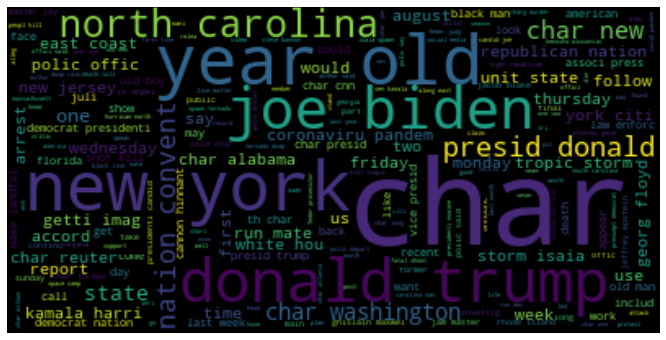

In [25]:
from wordcloud import WordCloud

# plot the wordcloud

df['clean_content'] = [' '.join(map(str, l)) for l in df['clean_content']]
allWords = ' '.join(content for content in df['clean_content'])

wordCloud = WordCloud(stopwords = stopwords_english).generate(allWords)

plt.figure( figsize=(14,6))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')

In [26]:
print ("There are {} words in the combination of all news content.".format(len(allWords)))

There are 1249075 words in the combination of all news content.


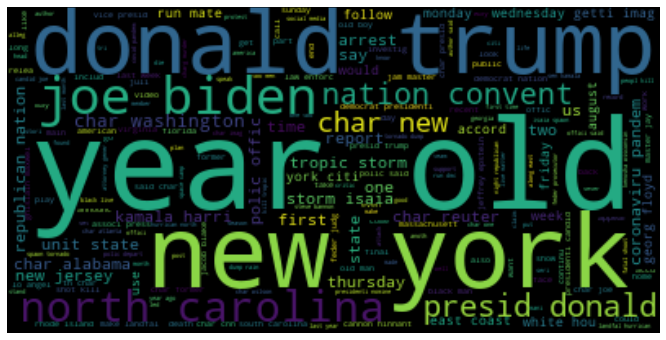

In [27]:
# Create stopword list:
stopwords_english.append("char") # coming from the shortened text [+1638 chars]

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords_english).generate(allWords)

# Display the generated image:
plt.figure( figsize=(14,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

In [28]:
# create a fuction to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [30]:
from textblob import TextBlob

# create two new columns for sentiment scores
df['subjectivity'] = df['clean_content'].apply(getSubjectivity)
df['polarity'] = df['clean_content'].apply(getPolarity)

In [31]:
df.head()

,content,state,clean_content,subjectivity,polarity
0,"In our Back to School series, we tackle the bi...",Maine,back school seri tackl big issu student face p...,0.050000,0.000000
1,A blunt explanation for why technology corpora...,Maine,blunt explan technolog corpor consum face one ...,0.300000,0.008333
2,Anchorage Department of Public Safety Handout\...,Maine,anchorag depart public safeti handout brisk ea...,0.116667,-0.062500
3,"There’s a Christian ministry in Bangor, Maine ...",Maine,christian ministri bangor main mansion church ...,0.245833,0.145833
4,A Revere man was arrested on a manslaughter ch...,Maine,rever man arrest manslaught charg wednesday co...,0.000000,-0.050000


In [32]:
# Groupby by state
state = df.groupby('state')

# Summary statistic of all countries
state.describe()

subjectivity                                               \
                      count      mean       std  min       25%       50%   
state                                                                      
Connecticut           628.0  0.294334  0.272542  0.0  0.000000  0.268750   
Delaware              623.0  0.269504  0.250909  0.0  0.000000  0.266667   
Florida               694.0  0.297175  0.282912  0.0  0.000000  0.259470   
Georgia               674.0  0.306515  0.274854  0.0  0.000000  0.314583   
Maine                 602.0  0.302117  0.254212  0.0  0.000000  0.304167   
Maryland              682.0  0.302485  0.266983  0.0  0.000000  0.277778   
Massachusetts         676.0  0.325290  0.311743  0.0  0.000000  0.297980   
New Hampshire         607.0  0.291892  0.251424  0.0  0.019444  0.270909   
New Jersey            692.0  0.332442  0.248100  0.0  0.150000  0.333333   
New York              693.0  0.323260  0.244214  0.0  0.125000  0.333333   
North Carolina        676.0  0.229412  0.246830  0.0  0.000000  0.166667   
Rhode Island          501.0  0.270621  0.279466  0.0  0.000000  0.250000   
South Carolina        650.0  0.271385  0.260476  0.0  0.000000  0.250000   
Virginia              688.0  0.277225  0.263709  0.0  0.000000  0.257071   

                              polarity                                       \
                     75%  max    count      mean       std    min       25%   
state                                                                         
Connecticut     0.454545  1.0    628.0  0.029370  0.252598 -1.000 -0.025000   
Delaware        0.433333  1.0    623.0  0.056497  0.219234 -1.000  0.000000   
Florida         0.454545  1.0    694.0  0.020930  0.224698 -1.000 -0.050000   
Georgia         0.477273  1.0    674.0  0.031027  0.211591 -0.800 -0.033333   
Maine           0.463084  1.0    602.0  0.070098  0.224431 -0.800  0.000000   
Maryland        0.454545  1.0    682.0  0.000156  0.238151 -1.000 -0.065909   
Massachusetts   0.510000  1.0    676.0  0.037535  0.277643 -1.000 -0.010101   
New Hampshire   0.454545  1.0    607.0  0.034608  0.241268 -1.000 -0.075000   
New Jersey      0.454545  1.0    692.0  0.039839  0.228071 -1.000  0.000000   
New York        0.454545  1.0    693.0  0.021451  0.215576 -0.875 -0.015152   
North Carolina  0.400000  1.0    676.0  0.026049  0.199050 -1.000 -0.050000   
Rhode Island    0.454545  1.0    501.0  0.044552  0.223140 -0.875  0.000000   
South Carolina  0.448438  1.0    650.0  0.013072  0.222780 -1.000 -0.037500   
Virginia        0.454545  1.0    688.0  0.032855  0.220459 -0.875 -0.010101   

                                         
                     50%       75%  max  
state                                    
Connecticut     0.000000  0.125000  1.0  
Delaware        0.000000  0.131061  0.8  
Florida         0.000000  0.100000  0.8  
Georgia         0.000000  0.120000  0.9  
Maine           0.000000  0.166667  1.0  
Maryland        0.000000  0.125000  1.0  
Massachusetts   0.000000  0.136648  0.8  
New Hampshire   0.000000  0.136364  1.0  
New Jersey      0.018182  0.136364  1.0  
New York        0.000000  0.136364  1.0  
North Carolina  0.000000  0.083333  1.0  
Rhode Island    0.000000  0.100000  1.0  
South Carolina  0.000000  0.100000  0.8  
Virginia        0.000000  0.107813  1.0

In [33]:
def getAnalysis(score):
    if score  < 0:
        return 'negatif'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['polarity'].apply(getAnalysis)

In [34]:
df.head()

,content,state,clean_content,subjectivity,polarity,sentiment
0,"In our Back to School series, we tackle the bi...",Maine,back school seri tackl big issu student face p...,0.050000,0.000000,neutral
1,A blunt explanation for why technology corpora...,Maine,blunt explan technolog corpor consum face one ...,0.300000,0.008333,positive
2,Anchorage Department of Public Safety Handout\...,Maine,anchorag depart public safeti handout brisk ea...,0.116667,-0.062500,negatif
3,"There’s a Christian ministry in Bangor, Maine ...",Maine,christian ministri bangor main mansion church ...,0.245833,0.145833,positive
4,A Revere man was arrested on a manslaughter ch...,Maine,rever man arrest manslaught charg wednesday co...,0.000000,-0.050000,negatif


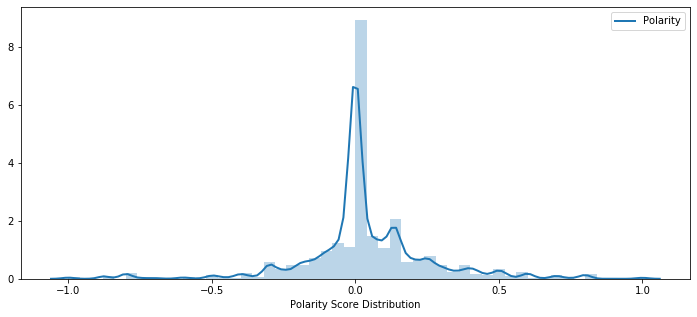

In [36]:
import seaborn as sns
# showing the distribution of polarity scores
plt.figure(figsize=(12,5))
ax = sns.distplot(df.polarity, bins=50, kde_kws={"lw": 2, "label": 'Polarity'}, hist_kws={"alpha": 0.3})
plt.xlabel('Polarity Score Distribution')
plt.show()

<Figure size 864x360 with 0 Axes>

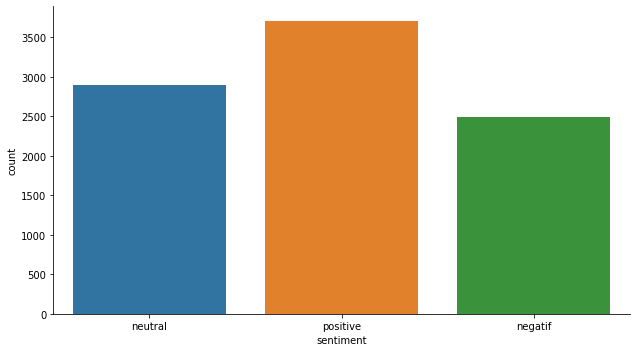

In [37]:
# number of sentiments in each category
plt.figure(figsize=(12,5))
_ = sns.catplot(x='sentiment', kind="count", data=df, height=5, aspect=1.75)
plt.show()

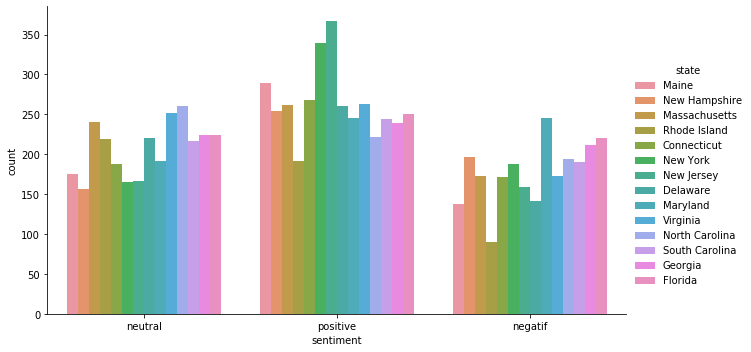

In [38]:
# number of sentiments in each category for each state
_ = sns.catplot(x='sentiment', kind="count",hue='state', data=df, height=5, aspect=1.75)